For more details on scFates, please see the [documentation](https://scfates.readthedocs.io/en/latest/index.html)

Point interpreter to R, import packages, fetch data.

In [97]:
import os, sys
os.environ['R_HOME'] = sys.exec_prefix+"/lib/R/"

In [2]:
print(os.environ['R_HOME'])

/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/R/


In [3]:
import scanpy as sc
import scFates as scf
import numpy as np
import pandas as pd

In [4]:
!wget https://compstemcellbio.s3.amazonaws.com/2024/TI/adata_Stam_250_022224.h5ad

--2025-03-05 17:14:33--  https://compstemcellbio.s3.amazonaws.com/2024/TI/adata_Stam_250_022224.h5ad
Resolving compstemcellbio.s3.amazonaws.com (compstemcellbio.s3.amazonaws.com)... 52.217.84.52, 3.5.28.109, 3.5.20.136, ...
connected. to compstemcellbio.s3.amazonaws.com (compstemcellbio.s3.amazonaws.com)|52.217.84.52|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 30948532 (30M) [binary/octet-stream]
Saving to: ‘adata_Stam_250_022224.h5ad.1’

adata_Stam_250_0222 100%[===================>]  29.51M  19.1MB/s    in 1.5s    

2025-03-05 17:14:35 (19.1 MB/s) - ‘adata_Stam_250_022224.h5ad.1’ saved [30948532/30948532]



In [5]:
adata = sc.read_h5ad("adata_Stam_250_022224.h5ad")

In [6]:
adata

AnnData object with n_obs × n_vars = 2750 × 36601
    obs: 'day', 'sample', 'experiment', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'

In [7]:
adata.obs['sample'].value_counts()

sample
cd34.day0    250
ery.day2     250
ery.day4     250
ery.day6     250
ery.day8     250
ery.day11    250
mk.day2      250
mk.day4      250
mk.day6      250
mk.day8      250
mk.day11     250
Name: count, dtype: int64

Note that this partcular dataset is already normalized (your HW data will not be).
Now find HVG

In [8]:
sc.pp.highly_variable_genes(adata , min_mean=0.0125, max_mean=6, min_disp=0.25)

Perform PCA, plot embedding, and color with marker genes for CD34 HSPCs, Erythrocytes, and Megakaryocytes (Human)

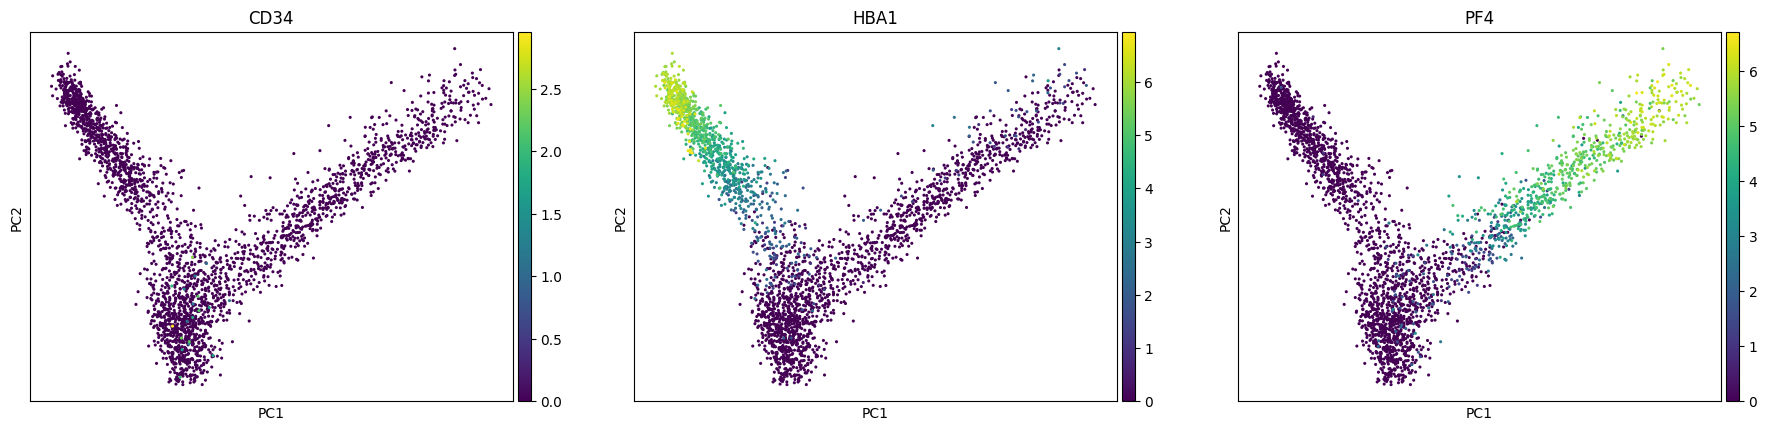

In [9]:
sc.tl.pca(adata, mask_var='highly_variable')
sc.pl.pca(adata, color=["CD34", "HBA1", "PF4"], s=20)

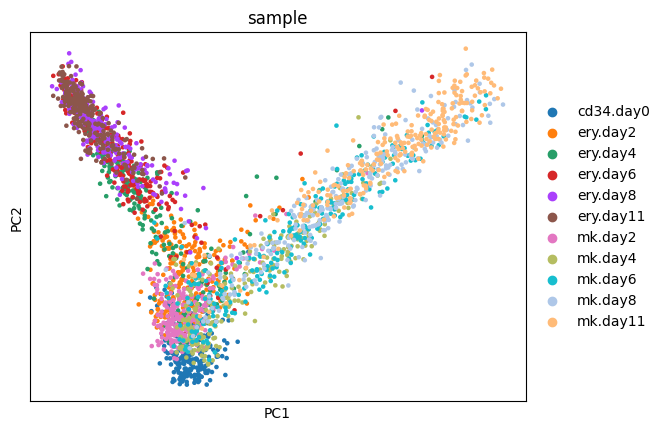

In [10]:
sc.pl.pca(adata, color='sample')

`cf.tl.tree()` fits a principal tree to this embedding.

See [documentation](https://scfates.readthedocs.io/en/latest/scFates.tl.tree.html#scFates.tl.tree) for parameters


In [11]:
adata

AnnData object with n_obs × n_vars = 2750 × 36601
    obs: 'day', 'sample', 'experiment', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'sample_colors'
    obsm: 'X_pca'
    varm: 'PCs'

In [12]:
adata.obsm['X_pca'].shape

(2750, 50)

In [13]:
scf.tl.tree(adata,method="ppt",Nodes=10,use_rep="X_pca")

inferring a principal tree --> parameters used 
    10 principal points, sigma = 0.1, lambda = 1, metric = euclidean
    fitting:   2%|▌                              | 1/50 [00:00<00:24,  2.03it/s]
    converged
    finished (0:00:00) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


Plot the tree on top of the pca embedding with scf.pl.graph()

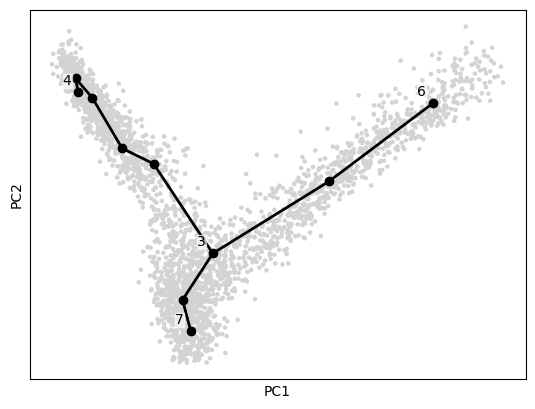

In [14]:
scf.pl.graph(adata, basis='pca')

Why does the trajectory bend back (top left)?

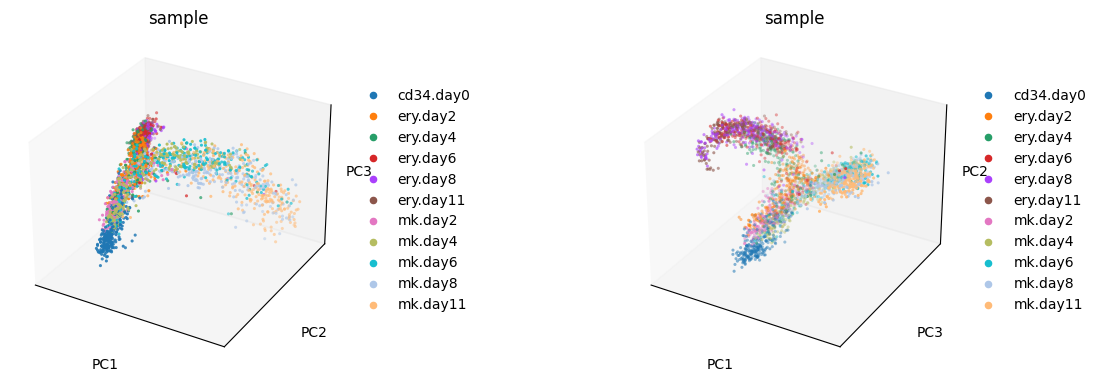

In [15]:
sc.pl.pca(adata, color=["sample"],projection="3d", components = ['1,2,3', '1,3,2'], s=20)

We should restrict tree finding to 1st 3 PCs

In [16]:
scf.tl.tree(adata, method="ppt", Nodes=10, use_rep="X_pca", ndims_rep = 3)

inferring a principal tree --> parameters used 
    10 principal points, sigma = 0.1, lambda = 1, metric = euclidean
    fitting:   0%|                                       | 0/50 [00:00<?, ?it/s]
    converged
    finished (0:00:00) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


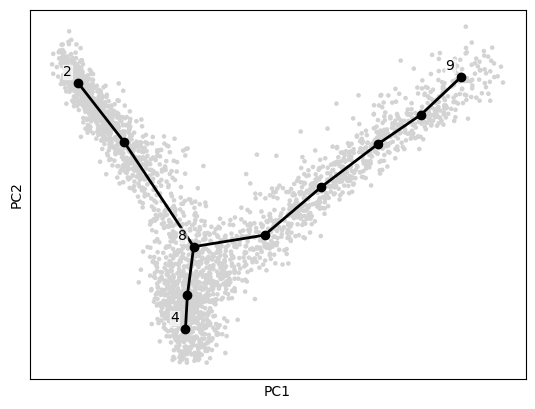

In [17]:
scf.pl.graph(adata, basis='pca')

Explore other parameters:
- `nodes`
- `ppt_lambda`
- `ppt_sigma`

inferring a principal tree --> parameters used 
    50 principal points, sigma = 0.1, lambda = 1, metric = euclidean
    fitting:  42%|████████████▏                | 21/50 [00:00<00:00, 121.76it/s]
    converged
    finished (0:00:00) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


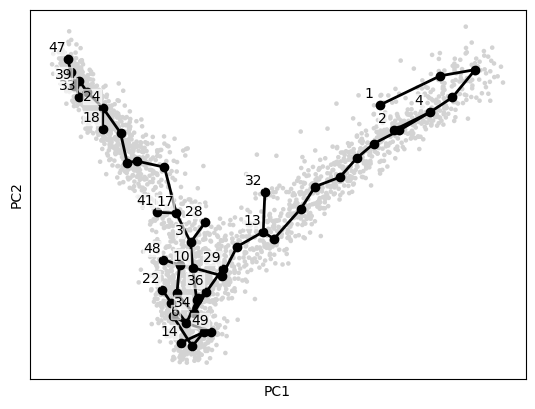

In [18]:
scf.tl.tree(adata,method="ppt",Nodes=50,use_rep="X_pca", ndims_rep = 3)
scf.pl.graph(adata, basis='pca')

inferring a principal tree --> parameters used 
    100 principal points, sigma = 0.75, lambda = 100, metric = euclidean
    fitting:  30%|████████▍                   | 30/100 [00:00<00:00, 116.04it/s]
    converged
    finished (0:00:00) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


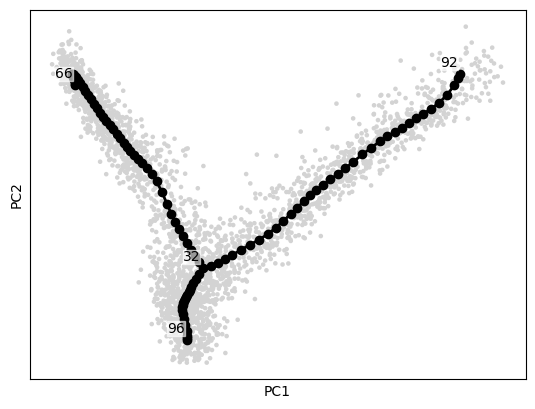

In [19]:
scf.tl.tree(adata,method="ppt",Nodes=100,use_rep="X_pca", ppt_lambda=100,ppt_sigma=0.75,ppt_nsteps=100, ndims_rep = 3)
scf.pl.graph(adata, basis='pca')

Set a root node with scf.tl.root()

Then compute Pseudotime with scf.tl.pseudotime()

In [20]:
scf.tl.root(adata, 96)

node 96 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


tl.pseudotime also assigns cells to:

obs. "seg", "milestones"

plot PCA colored by ^^



In [21]:
scf.tl.pseudotime(adata,seed=42)


projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


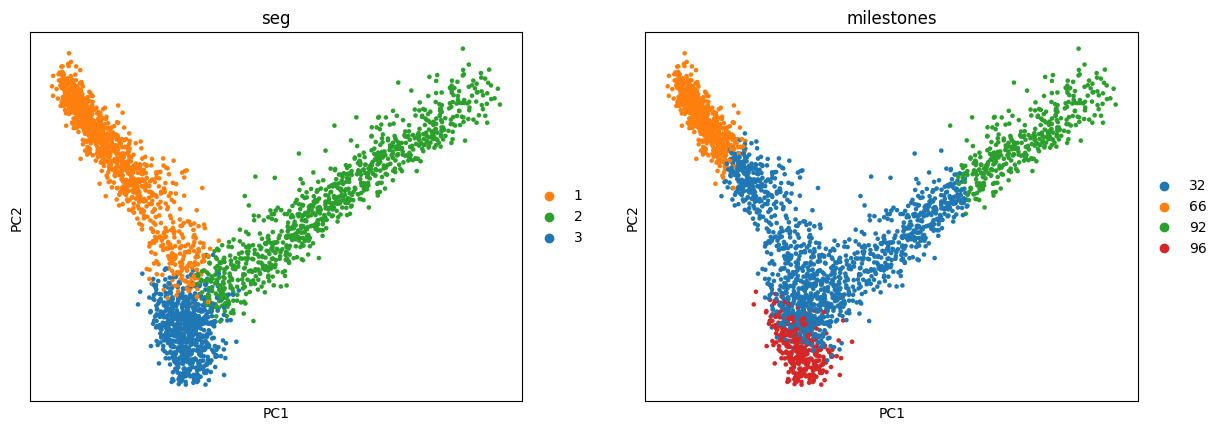

In [22]:
sc.pl.pca(adata, color=["seg", "milestones"])

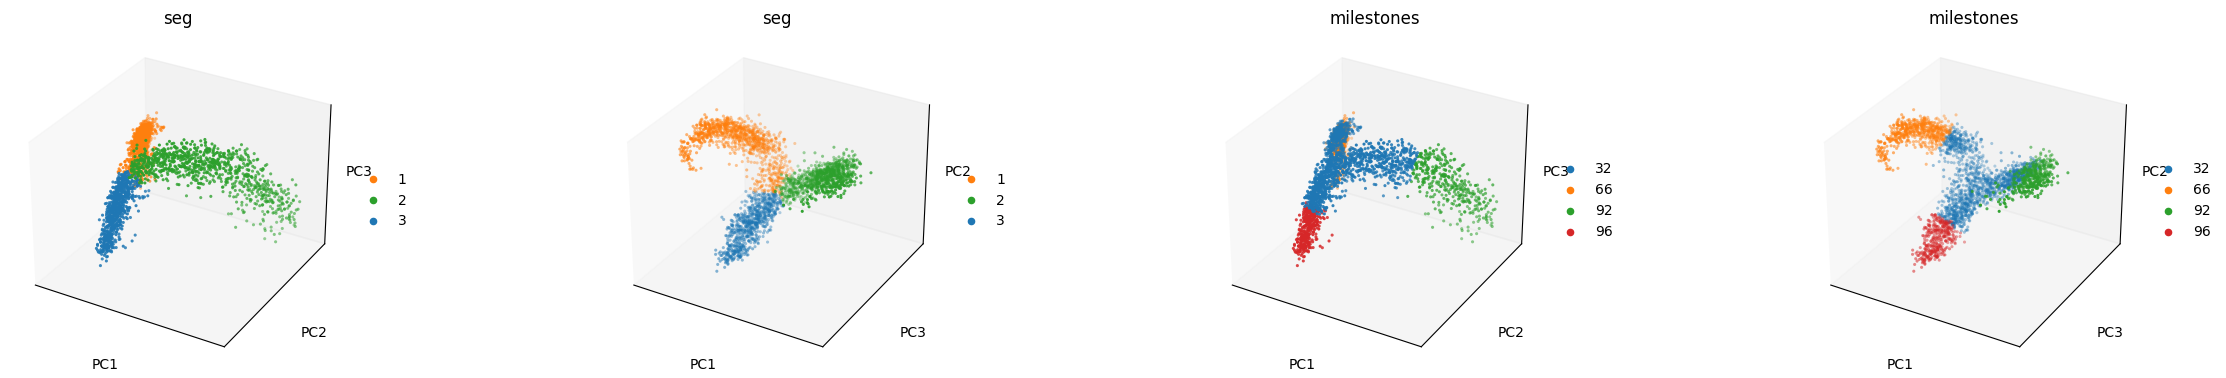

In [23]:
sc.pl.pca(adata, color=["seg", "milestones"],projection="3d", components = ['1,2,3', '1,3,2'], s=20)

You can overlay trajectory, PT, on the embedding with
scf.pl.trajectory()

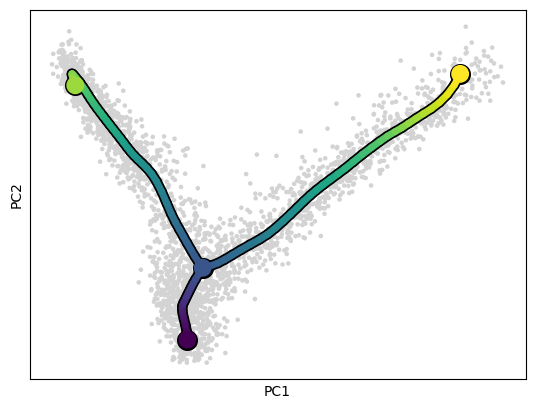

In [24]:
scf.pl.trajectory(adata, basis='pca')

And you can use scany plotting to show pseudotime for each cell

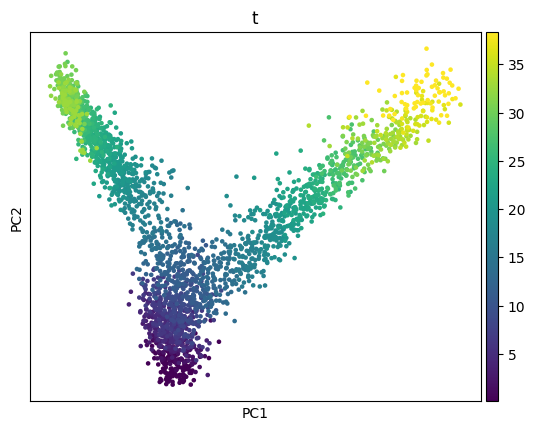

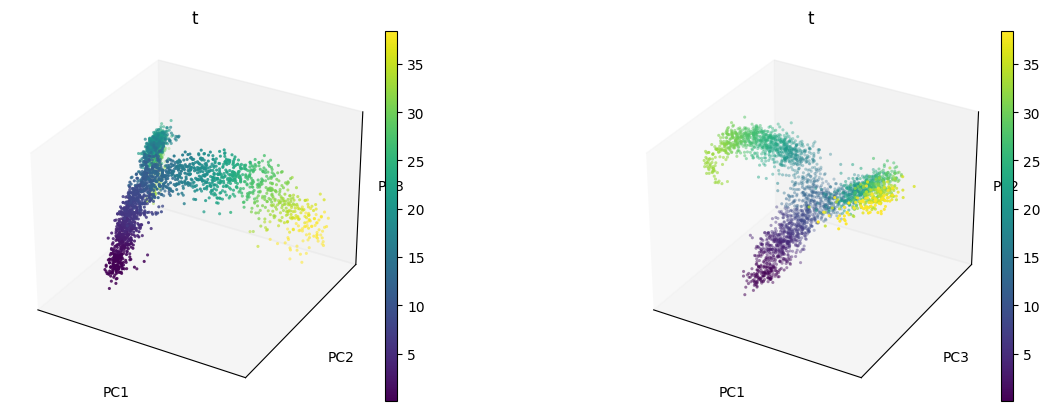

In [25]:
sc.pl.pca(adata, color='t')
sc.pl.pca(adata, color=["t"],projection="3d", components = ['1,2,3', '1,3,2'], s=20)

cluster cells into a real tree with
scf.tl.dendrogram()
and plot with
scf.pl.dendrogram()

In [26]:
scf.tl.dendrogram(adata)

Generating dendrogram of tree
    segment : 100%|███████████████████████████████| 3/3 [00:00<00:00,  3.29it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


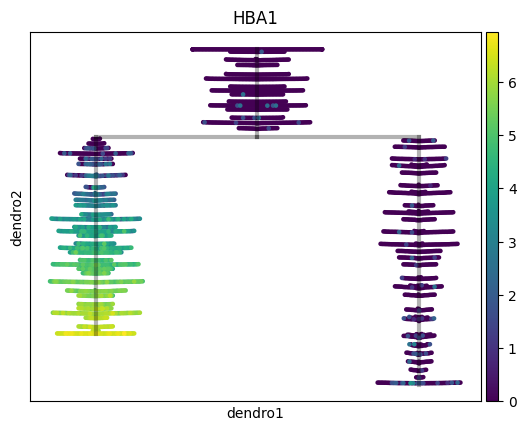

In [28]:
scf.pl.dendrogram(adata, color=['HBA1'])

Test for genes whose expresion is associated with PT and branching

First, subset the data so that this is quick


In [39]:
ad2 = adata.copy()
ad2 = ad2[:,ad2.var['highly_variable']]
# to speed up execution of test_association, sub-sample the data as below
# ad2 = ad2[:,np.random.choice(ad2.n_vars, 500, replace=False)]

# you can also specify the number of jobs to run in parallel if you system supports this with the n_jobs parameter

Now perform the test

In [75]:
scf.tl.test_association(ad2, fdr_cut=0.25, A_cut=.4, n_jobs = 20)

test features for association with the trajectory
    single mapping : 100%|██████████████████| 4639/4639 [00:49<00:00, 93.67it/s]
    found 699 significant features (0:00:49) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/scFates/tools/test_association.py:413: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var[c] = stat_assoc[c]


In [76]:
# ad2.var['signi'].value_counts()


In [77]:
ad3 = ad2.copy()
scf.tl.fit(ad3, n_jobs=20) # fits genes to trajectory
ad3.var

fit features associated with the trajectory
    single mapping :  71%|██████████████▏     | 497/699 [00:10<00:04, 48.73it/s]

/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    single mapping :  73%|██████████████▌     | 510/699 [00:11<00:04, 46.21it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


    single mapping : 100%|████████████████████| 699/699 [00:17<00:00, 39.97it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:17) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


,Accession,Chromosome,End,Start,Strand,highly_variable,means,dispersions,dispersions_norm,p_val,A,fdr,st,signi
HP1BP3,ENSG00000127483,1,20787323,20742679,-,True,0.769912,1.865717,0.448787,1.181477e-16,0.499296,5.480873e-13,1,True
EIF4G3,ENSG00000075151,1,21176888,20806292,-,True,0.450619,1.914048,0.730141,1.092165e-93,0.827920,5.066555e-90,1,True
HNRNPR,ENSG00000125944,1,23344336,23303771,-,True,0.582793,1.787895,0.273731,3.026882e-40,0.529806,1.404171e-36,1,True
ID3,ENSG00000117318,1,23559501,23557926,-,True,0.331609,2.872770,4.198693,4.870580e-212,1.142615,2.259462e-208,1,True
RHCE,ENSG00000188672,1,25430192,25362249,-,True,0.428462,1.796913,0.306358,0.000000e+00,1.337406,0.000000e+00,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PGRMC1,ENSG00000101856,X,119244466,119236245,+,True,0.555356,1.794529,0.297733,1.834102e-19,0.440285,8.508400e-16,1,True
RAB33A,ENSG00000134594,X,130184870,130171962,+,True,0.470637,1.811213,0.358095,1.758523e-75,0.713661,8.157787e-72,1,True
PHF6,ENSG00000156531,X,134428791,134373253,+,True,0.425871,1.936639,0.811870,8.659728e-20,0.405178,4.017248e-16,1,True
FHL1,ENSG00000022267,X,136211359,136146702,+,True,0.591447,2.977816,4.578740,2.898772e-143,1.173347,1.344740e-139,1,True


In [78]:
ad3.var['st'].value_counts()

st
1    699
Name: count, dtype: int64

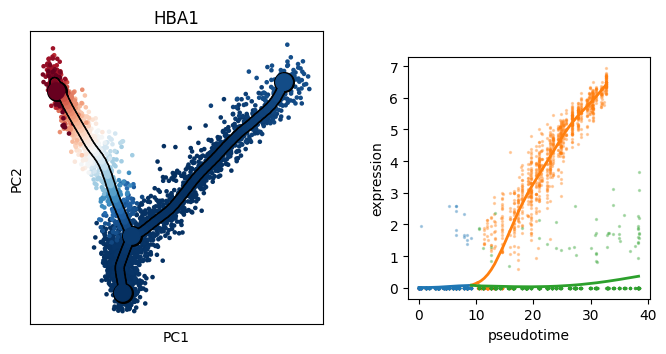

In [79]:
scf.pl.single_trend(ad3,"HBA1",basis="pca")

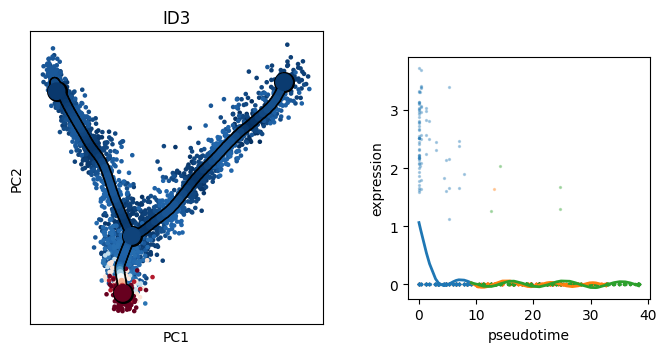

In [80]:
scf.pl.single_trend(ad3,"ID3",basis="pca")

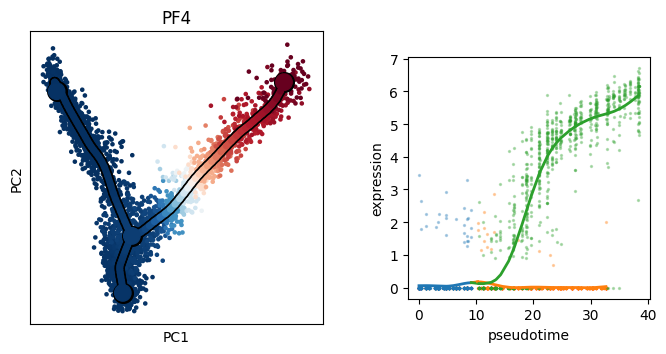

In [81]:
scf.pl.single_trend(ad3,"PF4",basis="pca")

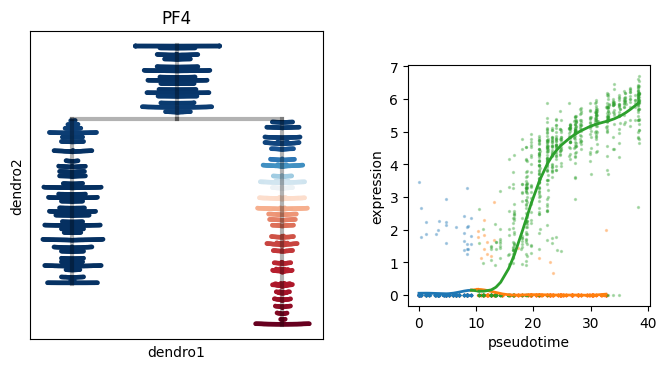

In [82]:
scf.pl.single_trend(ad3,"PF4",basis="dendro")

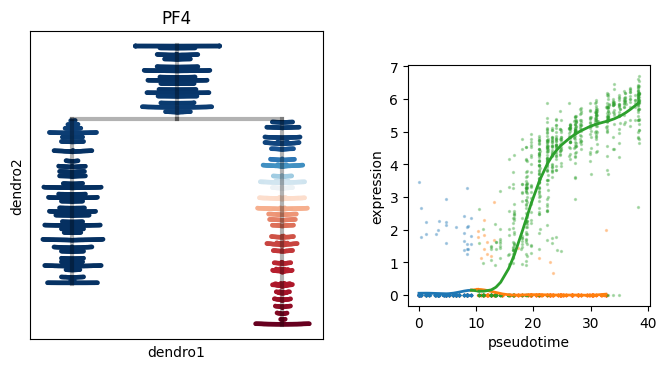

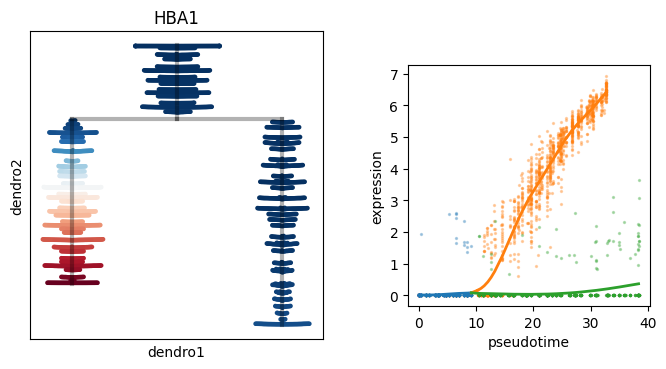

In [84]:
scf.pl.single_trend(ad3,"PF4",basis="dendro")
scf.pl.single_trend(ad3,"HBA1",basis="dendro")

In [85]:
scf.tl.test_fork(ad3,root_milestone="96",milestones=["66","92"],n_jobs=20,rescale=True)

testing fork
    single mapping
    Differential expression:   2%|▎            | 15/699 [00:00<00:21, 32.44it/s]

/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Differential expression:   2%|▎            | 16/699 [00:01<01:07, 10.17it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Differential expression:   3%|▎            | 18/699 [00:02<01:24,  8.07it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Differential expression:   3%|▎            | 20/699 [00:02<01:37,  6.96it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


    Differential expression:   8%|█            | 54/699 [00:05<01:06,  9.66it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


    Differential expression:   8%|█            | 58/699 [00:05<01:02, 10.34it/s]

/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Differential expression:   9%|█            | 60/699 [00:06<01:13,  8.70it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Differential expression:  10%|█▎           | 71/699 [00:07<01:09,  9.05it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


    Differential expression:  12%|█▌           | 82/699 [00:09<01:14,  8.28it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


    Differential expression:  15%|█▊          | 102/699 [00:10<00:58, 10.14it/s]

/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Differential expression:  18%|██▏         | 126/699 [00:11<00:53, 10.78it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


    Differential expression:  32%|███▊        | 225/699 [00:14<00:30, 15.52it/s]

/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Differential expression:  36%|████▎       | 251/699 [00:15<00:28, 15.84it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


    Differential expression:  39%|████▋       | 273/699 [00:16<00:25, 16.93it/s]

/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Differential expression:  41%|████▉       | 289/699 [00:17<00:25, 16.40it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


    Differential expression:  45%|█████▍      | 315/699 [00:17<00:21, 17.63it/s]

/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Differential expression:  48%|█████▋      | 333/699 [00:19<00:21, 17.26it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


    Differential expression:  95%|███████████▍| 666/699 [00:26<00:01, 25.47it/s]

/opt/homebrew/Caskroom/miniforge/base/envs/scFates/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Differential expression: 100%|███████████▉| 697/699 [00:27<00:00, 25.71it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


    Differential expression: 100%|████████████| 699/699 [00:28<00:00, 24.71it/s]
    test for upregulation for each leave vs root
    upreg 92: 100%|██████████████████████████| 558/558 [00:03<00:00, 143.33it/s]
    finished (0:00:32) --> added 
    .uns['96->66<>92']['fork'], DataFrame with fork test results.


In [86]:
scf.tl.branch_specific(ad3,root_milestone="96",milestones=["66","92"],effect=0.25)

    branch specific features: 92: 276, 66: 48
    finished --> updated 
    .uns['96->66<>92']['fork'], DataFrame updated with additionnal 'branch' column.


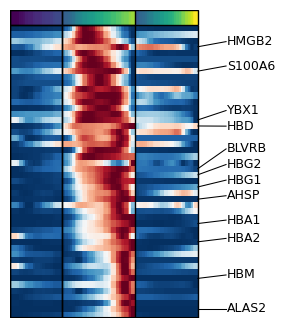

In [88]:
g1=scf.pl.trends(ad3,
                 root_milestone="96",
                 milestones=["66", "92"],
                 branch="66",
                 plot_emb=False,ordering="max",return_genes=True, n_features=12)


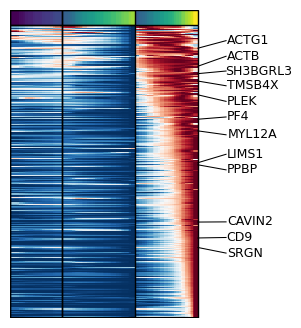

In [89]:
g2=scf.pl.trends(ad3,
                 root_milestone="96",
                 milestones=["66", "92"],
                 branch="92",
                 plot_emb=False,ordering="max",return_genes=True, n_features=12)

In [90]:
gg=g1.tolist()+g2.tolist()

Index(['APOE', 'GSTM3', 'EZR', 'HMGB2', 'APOC1', 'NMU', 'MT1X', 'S100A6',
       'FAM178B', 'MT1G',
       ...
       'SPARC', 'TNFAIP8', 'MTSS1', 'FRMD4B', 'GLA', 'NT5C3A', 'TUBB1',
       'ENDOD1', 'SQSTM1', 'ITM2B'],
      dtype='object', length=324)

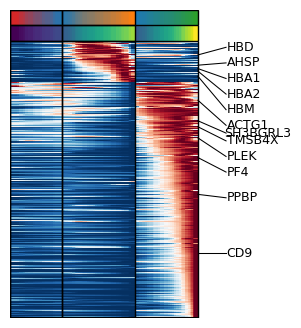

In [91]:
scf.pl.trends(ad3,gg,figsize=(4,4),annot="milestones",n_features=12,
        plot_emb=False,ordering=None,return_genes=True)


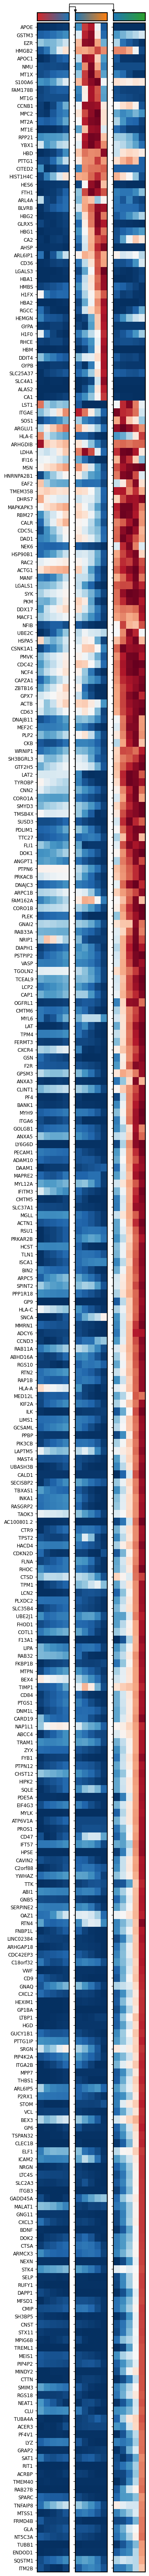

In [93]:
scf.pl.matrix(ad3,gg,norm="minmax",cmap="RdBu_r",colorbar=False)

In [94]:
scf.tl.cluster(ad3,n_neighbors=10,metric="correlation")

Clustering features using fitted layer
    finished (0:00:00) --> added 
    .var['clusters'] identified modules.


In [95]:
ad3.var.clusters.unique()

['5', '1', '4', '8', '0', '3', '6', '7', '9', '2']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

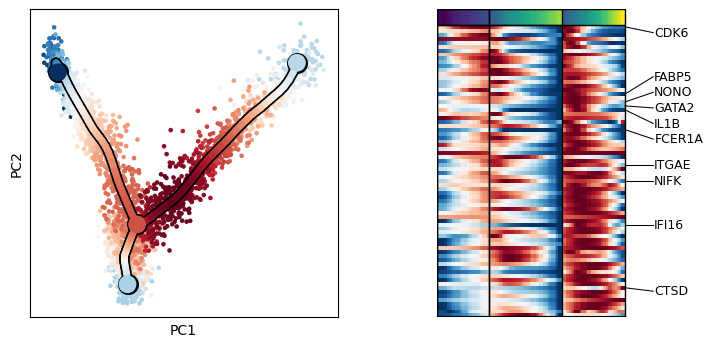

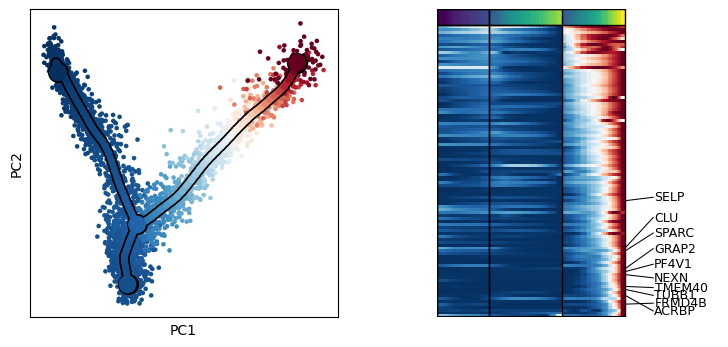

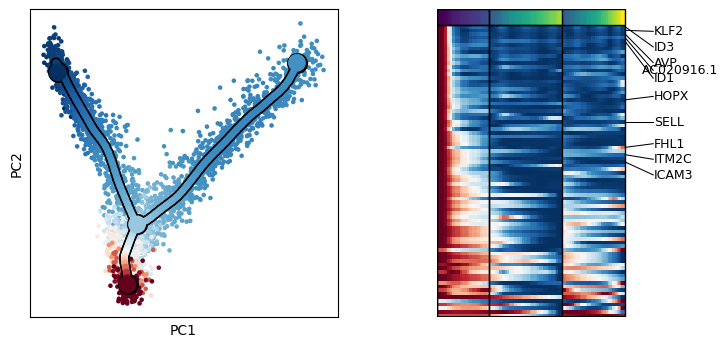

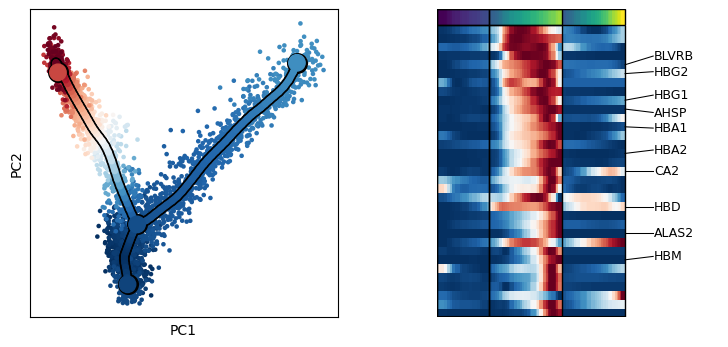

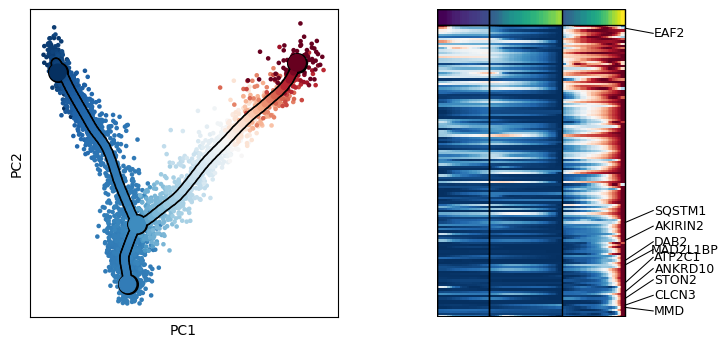

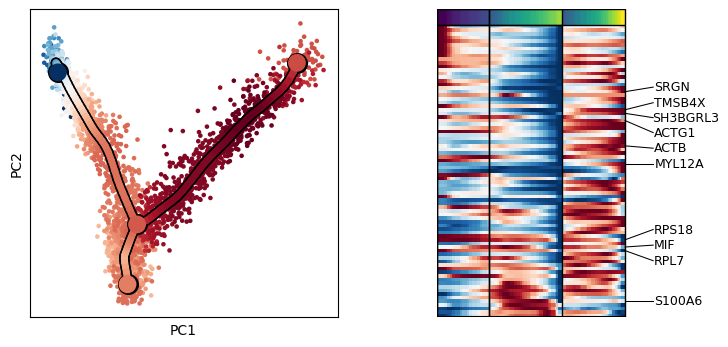

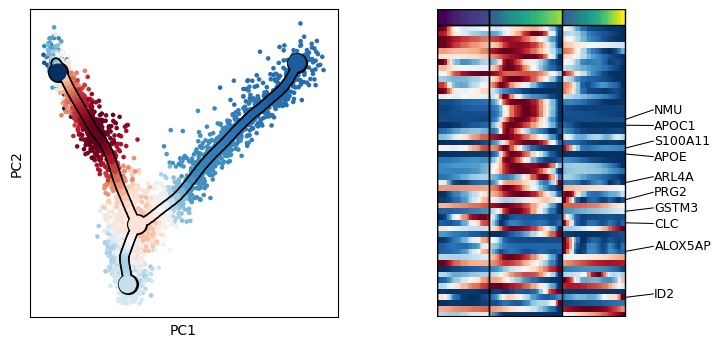

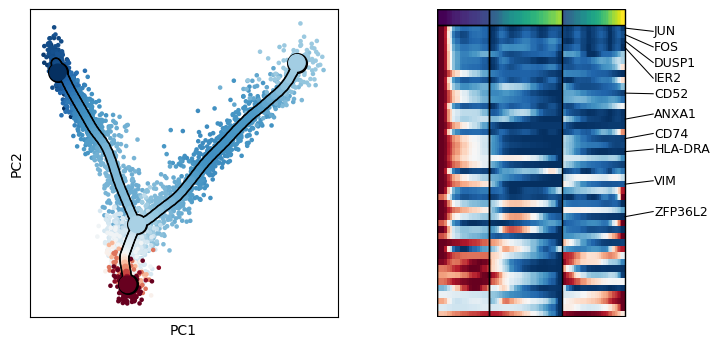

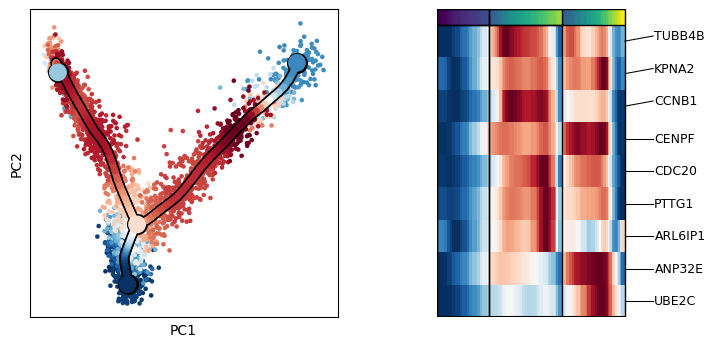

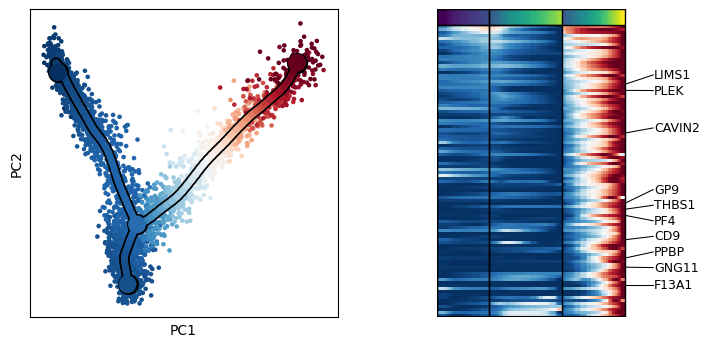

In [96]:
for c in ad3.var["clusters"].unique():
    scf.pl.trends(ad3,features=ad3.var_names[ad3.var.clusters==c],basis="pca")